In [2]:
!pip install shap
!pip install lime

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import lime
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [4]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: ylabel='count'>

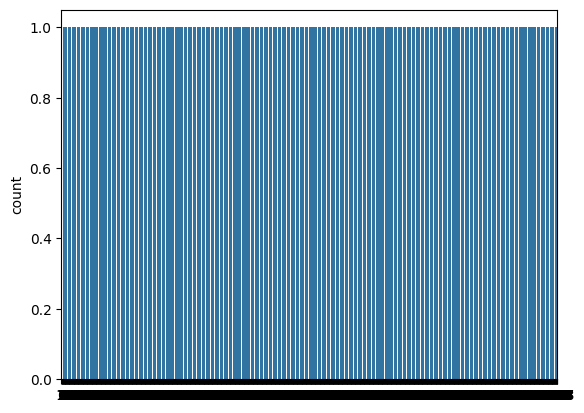

In [7]:
sns.countplot(wine['quality'])

Text(0.5, 1.0, 'Fixed Acidity')

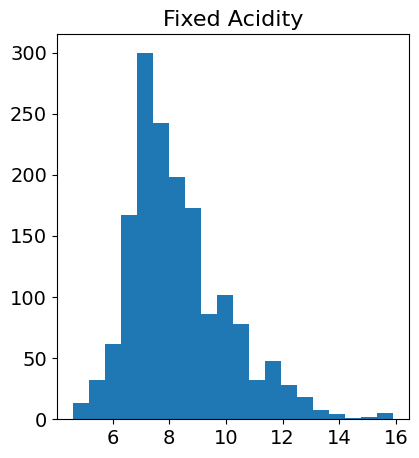

In [12]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(wine['fixed acidity'], bins=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Fixed Acidity", fontsize=16)

Text(0.5, 1.0, 'Volatile Acidity')

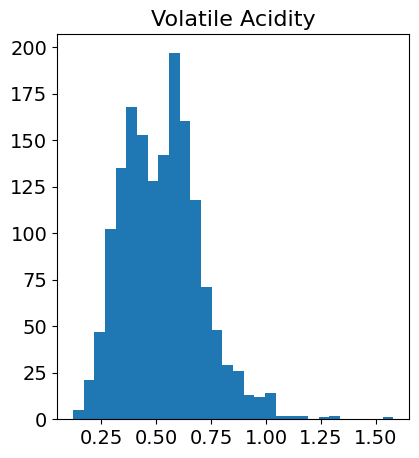

In [13]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(wine['volatile acidity'], bins=30)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Volatile Acidity", fontsize=16)

Text(0.5, 1.0, 'Alcohol')

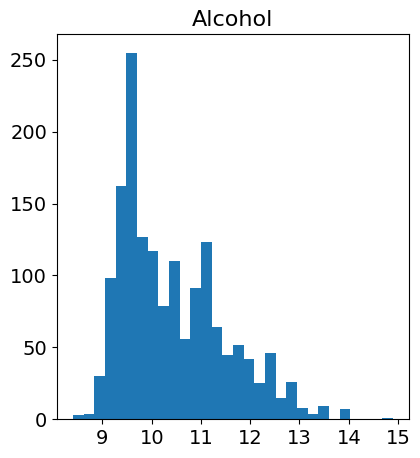

In [14]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(wine['alcohol'], bins=30)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Alcohol", fontsize=16)